In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

In [2]:
test_df = pd.read_csv('./data/test_Y3wMUE5_7gLdaTN.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
test_df.dropna(inplace = True)

In [4]:
test_df.shape

(289, 12)

In [5]:
df = pd.read_csv('./data/train_u6lujuX_CVtuZ9i.csv')

df.dropna(inplace = True)

df.Loan_Status = df.Loan_Status.replace({'N': 0, 'Y': 1})
df.Gender = df.Gender.replace({'Male': 1, 'Female': 0})
df.Married = df.Married.replace({'Yes': 1, 'No': 0})
df.Dependents = df.Dependents.replace({'3+': 3}).astype(np.int64)
df.Education = df.Education.replace({'Graduate': 1, 'Not Graduate': 0})
df.Self_Employed = df.Self_Employed.replace({'Yes': 1, 'No': 0})

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [6]:
df = pd.get_dummies(df, columns = ['Property_Area'], prefix = 'Prop', drop_first = True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Prop_Semiurban,Prop_Urban
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,0,1


In [7]:
df.shape

(480, 14)

In [8]:
df.groupby('Loan_Status').aggregate({'Prop_Semiurban': np.average, 'Prop_Urban': np.average})

,Prop_Semiurban,Prop_Urban
Loan_Status,,
0,0.283784,0.351351
1,0.448795,0.295181


In [9]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
Prop_Semiurban       0
Prop_Urban           0
dtype: int64

In [10]:
group = df.groupby('Loan_Status')\
          .aggregate({'Gender': np.average, 'Married': np.average, 
                      'Dependents': np.average, 'Education': np.average,
                      'Self_Employed': np.average, 'ApplicantIncome': np.average,
                      'CoapplicantIncome': np.average, 'LoanAmount': np.average,
                      'Loan_Amount_Term': np.average, 'Credit_History': np.average,
                      'Loan_ID': 'count'})\
          .rename(columns = {'Loan_ID': 'Count'})
group

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Count
Loan_Status,,,,,,,,,,,
0,0.783784,0.567568,0.722973,0.756757,0.155405,5730.189189,1773.081081,153.378378,342.810811,0.574324,148
1,0.837349,0.683735,0.801205,0.816265,0.129518,5201.093373,1495.508795,140.882530,341.710843,0.978916,332


In [11]:
predictors = []

### Perm Tests

In [12]:
def perm_fun(df, len_a, col):
    a = df[col].sample(len_a, replace=False)
    b = df[~df.index.isin(a.index)][col]
    
    return a.mean() - b.mean()

In [13]:
actual_diff = group.Gender.loc[1] - group.Gender.loc[0]
diffs = [perm_fun(df, group.Count.loc[1], 'Gender') for _ in range(1000)]

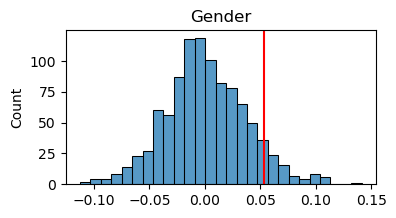

	P-val 0.148


In [14]:
plt.figure(figsize=(4,2))
sns.histplot(diffs)
plt.axvline(actual_diff, color = 'red')
plt.title("Gender")
plt.show()

p_val = np.array([np.abs(diff) > actual_diff for diff in diffs]).mean()
print("\tP-val", p_val)

if p_val <= .05:
    predictors.append('Gender')

In [15]:
actual_diff = group.Married.loc[1] - group.Married.loc[0]
diffs = [perm_fun(df, group.Count.loc[1], 'Married') for _ in range(1000)]

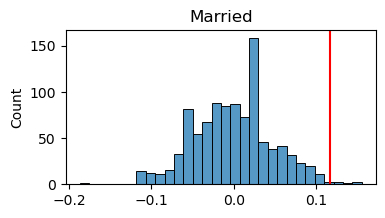

	P-val 0.01


In [16]:
plt.figure(figsize=(4,2))
sns.histplot(diffs)
plt.axvline(actual_diff, color = 'red')
plt.title("Married")
plt.show()

p_val = np.array([np.abs(diff) > np.abs(actual_diff) for diff in diffs]).mean()
print("\tP-val", p_val)

if p_val <= .05:
    predictors.append('Married')

In [17]:
actual_diff = group.Dependents.loc[1] - group.Dependents.loc[0]
diffs = [perm_fun(df, group.Count.loc[1], 'Dependents') for _ in range(1000)]

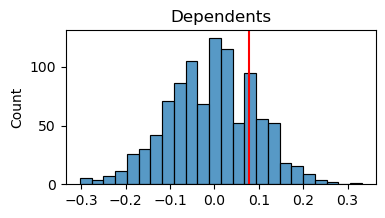

	P-val 0.398


In [18]:
plt.figure(figsize=(4,2))
sns.histplot(diffs)
plt.axvline(actual_diff, color = 'red')
plt.title("Dependents")
plt.show()

p_val = np.array([np.abs(diff) > np.abs(actual_diff) for diff in diffs]).mean()
print("\tP-val", p_val)

if p_val <= .05:
    predictors.append('Dependents')

In [19]:
actual_diff = group.Education.loc[1] - group.Education.loc[0]
diffs = [perm_fun(df, group.Count.loc[1], 'Education') for _ in range(1000)]

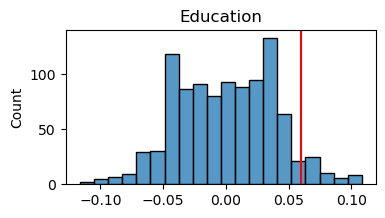

	P-val 0.101


In [20]:
plt.figure(figsize=(4,2))
sns.histplot(diffs)
plt.axvline(actual_diff, color = 'red')
plt.title("Education")
plt.show()

p_val = np.array([np.abs(diff) > np.abs(actual_diff) for diff in diffs]).mean()
print("\tP-val", p_val)

if p_val <= .05:
    predictors.append('Education')

In [21]:
actual_diff = group.Self_Employed.loc[1] - group.Self_Employed.loc[0]
diffs = [perm_fun(df, group.Count.loc[1], 'Self_Employed') for _ in range(1000)]

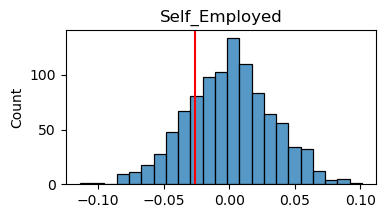

	P-val 0.391


In [22]:
plt.figure(figsize=(4,2))
sns.histplot(diffs)
plt.axvline(actual_diff, color = 'red')
plt.title("Self_Employed")
plt.show()

p_val = np.array([np.abs(diff) > np.abs(actual_diff) for diff in diffs]).mean()
print("\tP-val", p_val)

if p_val <= .05:
    predictors.append('Self_Employed')

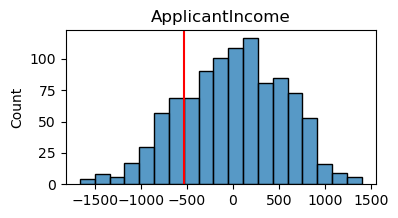

	P-val 0.379


In [23]:
actual_diff = group.ApplicantIncome.loc[1] - group.ApplicantIncome.loc[0]
diffs = [perm_fun(df, group.Count.loc[1], 'ApplicantIncome') for _ in range(1000)]

plt.figure(figsize=(4,2))
sns.histplot(diffs)
plt.axvline(actual_diff, color = 'red')
plt.title("ApplicantIncome")
plt.show()

p_val = np.array([np.abs(diff) > np.abs(actual_diff) for diff in diffs]).mean()
print("\tP-val", p_val)

if p_val <= .05:
    predictors.append('ApplicantIncome')

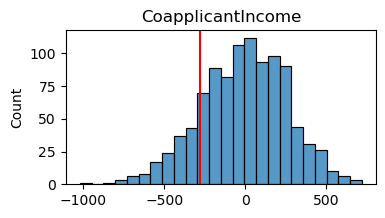

	P-val 0.285


In [24]:
actual_diff = group.CoapplicantIncome.loc[1] - group.CoapplicantIncome.loc[0]
diffs = [perm_fun(df, group.Count.loc[1], 'CoapplicantIncome') for _ in range(1000)]

plt.figure(figsize=(4,2))
sns.histplot(diffs)
plt.axvline(actual_diff, color = 'red')
plt.title("CoapplicantIncome")
plt.show()

p_val = np.array([np.abs(diff) > np.abs(actual_diff) for diff in diffs]).mean()
print("\tP-val", p_val)

if p_val <= .05:
    predictors.append('CoapplicantIncome')

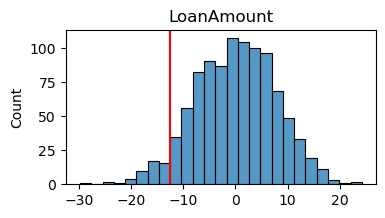

	P-val 0.102


In [25]:
actual_diff = group.LoanAmount.loc[1] - group.LoanAmount.loc[0]
diffs = [perm_fun(df, group.Count.loc[1], 'LoanAmount') for _ in range(1000)]

plt.figure(figsize=(4,2))
sns.histplot(diffs)
plt.axvline(actual_diff, color = 'red')
plt.title("LoanAmount")
plt.show()

p_val = np.array([np.abs(diff) > np.abs(actual_diff) for diff in diffs]).mean()
print("\tP-val", p_val)

if p_val <= .05:
    predictors.append('LoanAmount')

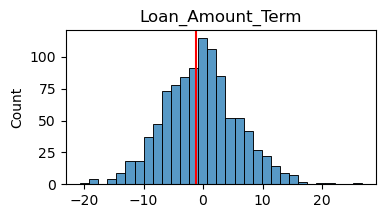

	P-val 0.835


In [26]:
actual_diff = group.Loan_Amount_Term.loc[1] - group.Loan_Amount_Term.loc[0]
diffs = [perm_fun(df, group.Count.loc[1], 'Loan_Amount_Term') for _ in range(1000)]

plt.figure(figsize=(4,2))
sns.histplot(diffs)
plt.axvline(actual_diff, color = 'red')
plt.title("Loan_Amount_Term")
plt.show()

p_val = np.array([np.abs(diff) > np.abs(actual_diff) for diff in diffs]).mean()
print("\tP-val", p_val)

if p_val <= .05:
    predictors.append('Loan_Amount_Term')

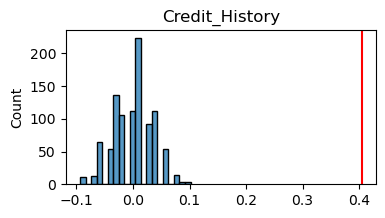

	P-val 0.0


In [27]:
actual_diff = group.Credit_History.loc[1] - group.Credit_History.loc[0]
diffs = [perm_fun(df, group.Count.loc[1], 'Credit_History') for _ in range(1000)]

plt.figure(figsize=(4,2))
sns.histplot(diffs)
plt.axvline(actual_diff, color = 'red')
plt.title("Credit_History")
plt.show()

p_val = np.array([np.abs(diff) > np.abs(actual_diff) for diff in diffs]).mean()
print("\tP-val", p_val)

if p_val <= .05:
    predictors.append('Credit_History')

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Prop_Semiurban,Prop_Urban
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,0,1


In [43]:
predictors.append('Prop_Semiurban')
predictors.append('Prop_Urban')

<AxesSubplot:>

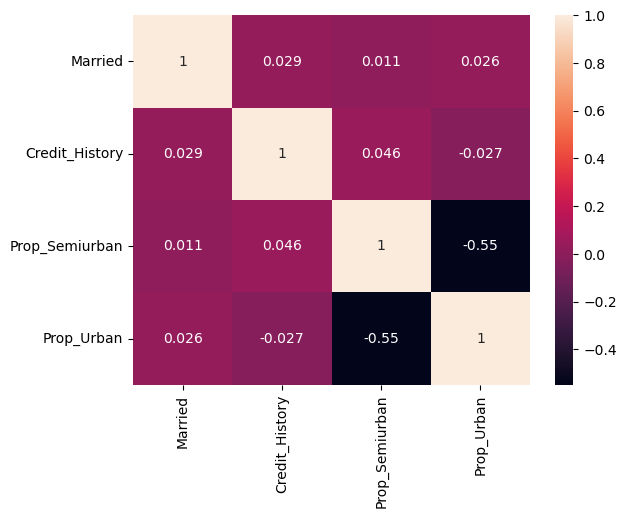

In [55]:
sns.heatmap(df[predictors].corr(), annot=True)

In [44]:
predictors

['Married', 'Credit_History', 'Prop_Semiurban', 'Prop_Urban']

In [45]:
outcome = 'Loan_Status'

X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[outcome], train_size = .7)

rf = RandomForestClassifier(n_estimators = 100)

rf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
df_metrics = pd.merge(X_test, y_test, left_index = True, right_index = True)

df_metrics['prediction'] = rf.predict(df_metrics[predictors])
df_metrics

,Married,Credit_History,Prop_Semiurban,Prop_Urban,Loan_Status,prediction
577,0,1.0,0,1,1,1
326,0,0.0,0,0,1,0
543,1,1.0,0,1,1,1
7,1,0.0,1,0,0,0
167,1,1.0,0,0,1,1
...,...,...,...,...,...,...
31,0,1.0,0,1,0,1
9,1,1.0,1,0,0,1
539,1,1.0,0,0,1,1
593,1,1.0,0,0,1,1


In [47]:
df_metrics.Loan_Status.value_counts()

1    102
0     42
Name: Loan_Status, dtype: int64

In [48]:
df_metrics.prediction.value_counts()

1    123
0     21
Name: prediction, dtype: int64

In [49]:
print("accuracy score:", np.round(accuracy_score(df_metrics.Loan_Status, df_metrics.prediction), 3))
print("precision score:", np.round(precision_score(df_metrics.Loan_Status, df_metrics.prediction), 3))
print("Recall Score:", np.round(recall_score(df_metrics.Loan_Status, df_metrics.prediction), 3))

accuracy score: 0.84
precision score: 0.821
Recall Score: 0.99


In [50]:
df_confusion_matrix = pd.DataFrame(confusion_matrix(df_metrics.Loan_Status, df_metrics.prediction))
df_confusion_matrix.rename(columns = {0: 'Predicted 0', 1: 'Predicted 1'}, index = {0: 'Actual 0', 1: 'Actual 1'}, inplace = True)
df_confusion_matrix

,Predicted 0,Predicted 1
Actual 0,20,22
Actual 1,1,101
